# Project Task: Week 1

## Exploratory Data Analysis (EDA):

1.    Perform an EDA on the Dataset.<br>
- [ ]    Check all the latent features and parameters with their __mean__ and __standard deviation__. Value are close to 0 centered              (mean) with unit standard deviation.<br>
- [ ]    Find if there is any connection between __Time, Amount, and the transaction being fraudulent__.<br>

In [1]:
# import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import imblearn
import scikitplot as skplt
import xgboost as xgb
import tensorflow as tf
import keras

from ipywidgets import Button, Layout
import warnings
warnings.filterwarnings("ignore")

In [2]:
test_data_hidden = pd.read_csv(r"C:/Users/jlod9/OneDrive/Desktop/AI__Projects/AI_Capstone/Financial/test_data_hidden.csv")

In [3]:
test_data_hidden.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,113050.0,0.114697,0.796303,-0.149553,-0.823011,0.878763,-0.553152,0.939259,-0.108502,0.111137,...,-0.335776,-0.807853,-0.055940,-1.025281,-0.369557,0.204653,0.242724,0.085713,0.89,0
1,26667.0,-0.039318,0.495784,-0.810884,0.546693,1.986257,4.386342,-1.344891,-1.743736,-0.563103,...,-1.377003,-0.072200,-0.197573,1.014807,1.011293,-0.167684,0.113136,0.256836,85.00,0
2,159519.0,2.275706,-1.531508,-1.021969,-1.602152,-1.220329,-0.462376,-1.196485,-0.147058,-0.950224,...,-0.193271,-0.103533,0.150945,-0.811083,-0.197913,-0.128446,0.014197,-0.051289,42.70,0
3,137545.0,1.940137,-0.357671,-1.210551,0.382523,0.050823,-0.171322,-0.109124,-0.002115,0.869258,...,0.157994,0.650355,0.034206,0.739535,0.223605,-0.195509,-0.012791,-0.056841,29.99,0
4,63369.0,1.081395,-0.502615,1.075887,-0.543359,-1.472946,-1.065484,-0.443231,-0.143374,1.659826,...,0.224157,0.821209,-0.137223,0.986259,0.563228,-0.574206,0.089673,0.052036,68.00,0


In [4]:
test_data_hidden.shape

(56962, 31)

In [5]:
test_data_hidden.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56962 entries, 0 to 56961
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    56962 non-null  float64
 1   V1      56962 non-null  float64
 2   V2      56962 non-null  float64
 3   V3      56962 non-null  float64
 4   V4      56962 non-null  float64
 5   V5      56962 non-null  float64
 6   V6      56962 non-null  float64
 7   V7      56962 non-null  float64
 8   V8      56962 non-null  float64
 9   V9      56962 non-null  float64
 10  V10     56962 non-null  float64
 11  V11     56962 non-null  float64
 12  V12     56962 non-null  float64
 13  V13     56962 non-null  float64
 14  V14     56962 non-null  float64
 15  V15     56962 non-null  float64
 16  V16     56962 non-null  float64
 17  V17     56962 non-null  float64
 18  V18     56962 non-null  float64
 19  V19     56962 non-null  float64
 20  V20     56962 non-null  float64
 21  V21     56962 non-null  float64
 22

In [6]:
test_data_hidden.mean()

Time      95057.882360
V1            0.013286
V2            0.006610
V3           -0.004263
V4            0.001496
V5           -0.003508
V6           -0.003079
V7            0.000141
V8           -0.006501
V9            0.001564
V10           0.003176
V11          -0.008330
V12          -0.000041
V13          -0.000320
V14          -0.003711
V15           0.002949
V16          -0.001734
V17           0.000030
V18           0.003325
V19           0.000766
V20          -0.002685
V21          -0.002253
V22          -0.004938
V23           0.004008
V24          -0.001017
V25          -0.000872
V26           0.004513
V27           0.001385
V28          -0.001990
Amount       87.658797
Class         0.001720
dtype: float64

In [7]:
test_data_hidden.std()

Time      47438.688395
V1            1.941231
V2            1.611224
V3            1.516853
V4            1.419107
V5            1.431731
V6            1.359647
V7            1.301800
V8            1.201138
V9            1.103688
V10           1.095156
V11           1.015901
V12           0.997691
V13           0.994583
V14           0.954667
V15           0.912533
V16           0.878088
V17           0.841764
V18           0.836135
V19           0.819729
V20           0.764450
V21           0.735871
V22           0.730301
V23           0.621623
V24           0.604191
V25           0.521003
V26           0.481857
V27           0.416750
V28           0.325640
Amount      258.042879
Class         0.041443
dtype: float64

__Time and Amount are the only columns that we need to standardize__

In [8]:
train_data = pd.read_csv(r"C:/Users/jlod9/OneDrive/Desktop/AI__Projects/AI_Capstone/Financial/train_data.csv")

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_data['std_amount'] = scaler.fit_transform(train_data['Amount'].values.reshape(-1, 1))
test_data_hidden['std_amount'] = scaler.transform(test_data_hidden['Amount'].values.reshape(-1, 1))

train_data['std_time'] = scaler.fit_transform(train_data['Time'].values.reshape(-1, 1))
test_data_hidden['std_time'] = scaler.transform(test_data_hidden['Time'].values.reshape(-1, 1))


In [10]:
train_data = train_data.drop(columns=['Amount', 'Time'])
test_data_hidden = test_data_hidden.drop(columns=['Amount', 'Time'])

- [x] Check all the latent features and parameters with their mean and standard deviation. Value are close to 0 centered (mean) with unit standard deviation.

In [11]:
corr = test_data_hidden[['std_amount', 'std_time', 'Class']].corr()
corr

,std_amount,std_time,Class
std_amount,1.000000,-0.007768,0.002263
std_time,-0.007768,1.000000,-0.010405
Class,0.002263,-0.010405,1.000000


<AxesSubplot:>

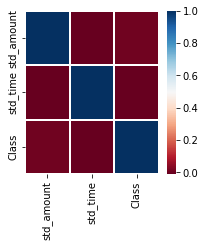

In [12]:
fig, ax = plt.subplots(figsize=(3, 3))

sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,
            linewidths=.1, cmap="RdBu", ax=ax)

<div class="alert alert-block alert-success">
<b>No apparent strong correlation, maybe due in part to being unbalanced. We will look at this in the next part.</b> 
</div>

- [x] Find if there is any connection between Time, Amount, and the transaction being fraudulent.

- [ ] 2 Check the class count for each class. It’s a class Imbalance problem.

In [13]:
# set X_train, X_test, y_train, y_test
X_train = train_data.drop(columns='Class')
X_test = test_data_hidden.drop(columns='Class')
y_train = train_data['Class']
y_test = test_data_hidden['Class']

In [14]:
print(X_train.shape,X_test.shape, y_train.shape, y_test.shape)

(227845, 30) (56962, 30) (227845,) (56962,)


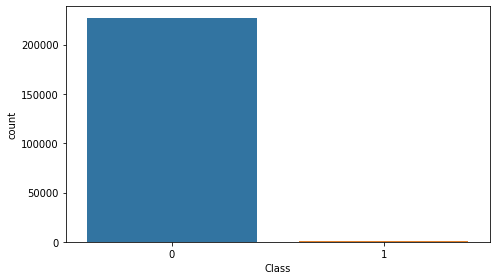

In [15]:
fig, ax = plt.subplots(figsize=(7, 4))
ax = sns.countplot(y_train)
plt.tight_layout()

In [16]:
print(pd.Series(train_data['Class']).value_counts())

0    227451
1       394
Name: Class, dtype: int64


<div class="alert alert-block alert-success">
<b>It's cleary very imbalanced.</b> 
</div>

- [x] 2 Check the class count for each class. It’s a class Imbalance problem.

- [ ] 3 Use techniques like undersampling or oversampling before running Naïve Bayes, Logistic Regression or SVM. <br>a.    Oversampling or undersampling can be used to tackle the class imbalance problem<br>b.    Oversampling increases the prior probability of imbalanced class and in case of other classifiers, error gets multiplied as the low-proportionate class is mimicked multiple times.

In [17]:
from imblearn.under_sampling import RandomUnderSampler

0    394
1    394
Name: Class, dtype: int64


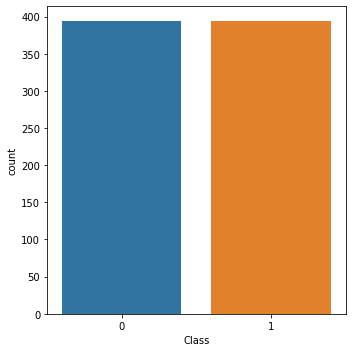

In [18]:
rus = RandomUnderSampler()
X_rus, y_rus = rus.fit_resample(X_train, y_train)

# check the balanced data
print(pd.Series(y_rus).value_counts())

# plot the new distribution
fig, ax = plt.subplots(figsize=(5, 5))
ax = sns.countplot(y_rus)
plt.tight_layout()

In [19]:
# Naïve Bayes using RandomUnderSampler
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
model_gnb = gnb.fit(X_rus, y_rus)
y_pred_gnb = model_gnb.predict(X_test)

In [20]:
# Logistic Regression using RandomUnderSampler
from sklearn.linear_model import LogisticRegression
model_log = LogisticRegression()
model_log.fit(X_rus, y_rus)
y_pred_log = model_log.predict(X_test)

In [21]:
# SVM model using RandomUnderSampler
from sklearn import svm
model_svm = svm.SVC()
model_svm.fit(X_rus, y_rus)
y_pred_svm = model_svm.predict(X_test)

- [x] 3 Use techniques like undersampling or oversampling before running Naïve Bayes, Logistic Regression or SVM.

- [ ] 4 Following are the matrices for evaluating the model performance: Precision, Recall, F1-Score, AUC-ROC curve.<br> Use F1-Score as the evaluation criteria for this project.

In [22]:
from sklearn.metrics import f1_score, precision_score, recall_score, classification_report, roc_auc_score

### Naïve Bayes matrix

In [23]:
# Precision
print("Precision:",precision_score(y_test, y_pred_gnb))

# Recall
print("Recall:",recall_score(y_test, y_pred_gnb))

# F1_Score
print("F1-Score:",f1_score(y_test, y_pred_gnb))


# classification report
print("We summarize this in the Classification report below")
print(classification_report(y_test, y_pred_gnb))

# ROC AUC score
print("Area Under the Receiver Operating Characteristics: {:.2f}\n".format(roc_auc_score(y_test, y_pred_gnb)))

Precision: 0.03756298671552909
Recall: 0.8367346938775511
F1-Score: 0.07189829022358614
We summarize this in the Classification report below
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     56864
           1       0.04      0.84      0.07        98

    accuracy                           0.96     56962
   macro avg       0.52      0.90      0.53     56962
weighted avg       1.00      0.96      0.98     56962

Area Under the Receiver Operating Characteristics: 0.90



### Logistic Regression Model

In [24]:
# Precision
print("Precision:",precision_score(y_test, y_pred_log))

# Recall
print("Recall:",recall_score(y_test, y_pred_log))

# F1_Score
print("F1-Score:",f1_score(y_test, y_pred_log))

# classification report
print("We summarize this in the Classification report below")
print(classification_report(y_test, y_pred_log))

# ROC AUC score
print("Area Under the Receiver Operating Characteristics: {:.2f}\n".format(roc_auc_score(y_test, y_pred_log)))


Precision: 0.04365482233502538
Recall: 0.8775510204081632
F1-Score: 0.08317214700193423
We summarize this in the Classification report below
              precision    recall  f1-score   support

           0       1.00      0.97      0.98     56864
           1       0.04      0.88      0.08        98

    accuracy                           0.97     56962
   macro avg       0.52      0.92      0.53     56962
weighted avg       1.00      0.97      0.98     56962

Area Under the Receiver Operating Characteristics: 0.92



### SVM model

In [25]:
# Precision
print("Precision:",precision_score(y_test, y_pred_svm))

# Recall
print("Recall:",recall_score(y_test, y_pred_svm))

# F1_Score
print("F1-Score:",f1_score(y_test, y_pred_svm))

# classification report
print("We summarize this in the Classification report below")
print(classification_report(y_test, y_pred_svm))

# ROC AUC score
print("Area Under the Receiver Operating Characteristics: {:.2f}\n".format(roc_auc_score(y_test, y_pred_svm)))

Precision: 0.09259259259259259
Recall: 0.8673469387755102
F1-Score: 0.1673228346456693
We summarize this in the Classification report below
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56864
           1       0.09      0.87      0.17        98

    accuracy                           0.99     56962
   macro avg       0.55      0.93      0.58     56962
weighted avg       1.00      0.99      0.99     56962

Area Under the Receiver Operating Characteristics: 0.93



<div class="alert alert-block alert-success">
<b>Although all 3 have a very low F1 score, the high AUC score means we can find the threshold for which its score is decent. This is not uncommon for imbalanced datasets as we have in this case.</b> 
</div>

- [x] 4 Use F1-Score as the evaluation criteria for this project.

## Project Task: Week 2
Modeling Techniques:
- [ ] 1 Try out models like Naive Bayes, Logistic Regression or SVM. Find out which one performs the best.
- [ ] 2   Use different Tree-based classifiers like Random Forest and XGBoost. <br>
    a. Remember Tree-based classifiers work on two ideologies: Bagging or Boosting<br>
    b. Tree-based classifiers have fine-tuning parameters which takes care of the imbalanced class. Random-Forest and                  XGBboost.<br>
- [ ] Compare the results of 1 with 2 and check if there is any incremental gain.

<div class="alert alert-block alert-info">
<b>Naive Bayes, Logistic Regression and SVM have been modeled above</b>
</div>

In [26]:
print("Based on F1-Score, we can say that Naive Bayes performs the best of the 3 models")

Based on F1-Score, we can say that Naive Bayes performs the best of the 3 models


- [x] 1 Try out models like Naive Bayes, Logistic Regression or SVM. Find out which one performs the best.

### Random Forest

In [27]:
# Do model for Random Forest 
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(max_depth=2, random_state=0)
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)

# F1-Score
print("F1-Score:",f1_score(y_test, y_pred_rf))

F1-Score: 0.6503067484662577


### XGBoost

In [28]:
xg_class = xgb.XGBClassifier(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1, 
                             max_depth = 5, alpha = 10, n_estimators = 10)
xg_class.fit(X_train,y_train)
y_pred_xgb = xg_class.predict(X_test)

# XGBoost F1-Score
print("F1-Score:",f1_score(y_test, y_pred_xgb))

[19:22:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
F1-Score: 0.6951219512195121


- [x] 2 Use different Tree-based classifiers like Random Forest and XGBoost.

<div class="alert alert-block alert-info">
<b>The last thing we need to do is compare the earlier model with the tree-based models. <br>
    Lets choose Naive Bayes and XGBoost because they both have the best F1-Score of their group</b>
</div>

### Naive Bayes incremental gains

<Figure size 504x504 with 0 Axes>

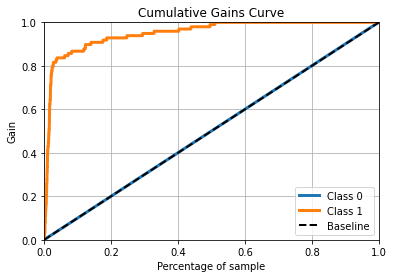

In [29]:
# cumulative gains chart
predicted_probas_gnb = model_gnb.predict_proba(X_test)
plt.figure(figsize=(7,7))
skplt.metrics.plot_cumulative_gain(y_test, predicted_probas_gnb)
plt.show()

### XGBoost incremental gains

<Figure size 504x504 with 0 Axes>

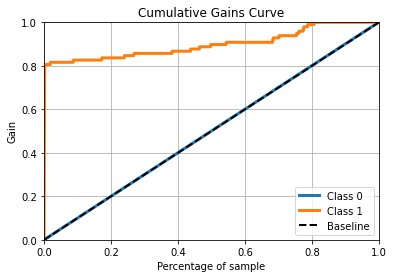

In [30]:
# cumulative gains chart
predicted_probas_xg = xg_class.predict_proba(X_test)
plt.figure(figsize=(7,7))
skplt.metrics.plot_cumulative_gain(y_test, predicted_probas_xg)
plt.show()

In [31]:
print("Naive Bayes has a F1-Score of",f1_score(y_test, y_pred_gnb))
print("Logistic Regression has a F1-Score of",f1_score(y_test, y_pred_log))
print("SVM has a F1-Score of",f1_score(y_test, y_pred_svm))
print("Random Forrest has a F1-Score of",f1_score(y_test, y_pred_rf))
print("XGBoost has a F1-Score of",f1_score(y_test, y_pred_xgb))

Naive Bayes has a F1-Score of 0.07189829022358614
Logistic Regression has a F1-Score of 0.08317214700193423
SVM has a F1-Score of 0.1673228346456693
Random Forrest has a F1-Score of 0.6503067484662577
XGBoost has a F1-Score of 0.6951219512195121


<div class="alert alert-block alert-success">
<b>Clearly XGBoost is the best if we are going by F1-Score.</b> <br>
<b>Random Forest has a slightly less impressive score.</b> 
</div>

- [x] Compare the results of 1 with 2 and check if there is any incremental gain.

## Project Task: Week 3
Applying ANN:

Use ANN (Artificial Neural Network) to identify fradulent and non-fradulent.
- [ ] (a) Fine-tune number of layers
- [ ] (b) Number of Neurons in each layers
- [ ] (c) Experiment in batch-size
- [ ] (d) Experiment with number of epochs. Check the observations in loss and accuracy
- [ ] (e) Play with different Learning Rate variants of Gradient Descent like Adam, SGD, RMS-prop
- [ ] (f) Find out which activation performs best for this use case and why?
- [ ] (g) Check Confusion Matrix, Precision, Recall and F1-Score

- [ ] 2  Try out Dropout for ANN. How is it performed? Compare model performance with the traditional ML based prediction models from above. 

- [ ] 3  Find the best setting of neural net that can be best classified as fraudulent and non-fraudulent transactions. Use techniques like Grid Search, Cross-Validation and Random search.

In [32]:
from sklearn.model_selection import train_test_split
X_train2, X_valid, y_train2, y_valid = train_test_split(X_train,y_train,test_size=0.1)

In [33]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization, LeakyReLU, PReLU
from keras import optimizers, metrics
from tensorflow.keras.optimizers import SGD
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

In [34]:
# import activation functions
from tensorflow.keras.activations import sigmoid
leaky_relu = LeakyReLU(alpha=0.01)

<div class="alert alert-block alert-success">
<b>Dropout: Dropout is a technique used to prevent a model from overfitting. Dropout works by randomly setting the outgoing edges of hidden units to 0 at each update of the training phase. </b>
</div>

In [35]:
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [36]:
def create_model(optimizer, activation, neurons):
# create model
    model = Sequential()
    model.add(Dense(neurons, input_dim=30, activation=activation))
    model.add(Dense(neurons, input_dim=30, activation=activation))
    model.add(Dense(neurons, input_dim=30, activation=activation))
    model.add(Dense(1, activation='sigmoid'))
# Compile model
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model


In [37]:
# create model
model = KerasClassifier(build_fn=create_model, verbose=0)

In [38]:
# define the grid search parameters
neurons = [15,25]                       # 1b
batch_size = [32, 64]                   # 1c
optimizer = ['SGD', 'RMSprop', 'Adam']  # 1e
activation = ['leaky_relu', 'sigmoid']  # 1f

param_grid = dict(neurons=neurons,batch_size=batch_size,optimizer=optimizer, activation=activation)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train, y_train)

In [39]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.999425 using {'activation': 'leaky_relu', 'batch_size': 32, 'neurons': 15, 'optimizer': 'Adam'}


In [40]:
grid_result

GridSearchCV(cv=3,
             estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x00000153563C1FA0>,
             n_jobs=-1,
             param_grid={'activation': ['leaky_relu', 'sigmoid'],
                         'batch_size': [32, 64], 'neurons': [15, 25],
                         'optimizer': ['SGD', 'RMSprop', 'Adam']})

In [41]:
grid_result.best_params_

{'activation': 'leaky_relu',
 'batch_size': 32,
 'neurons': 15,
 'optimizer': 'Adam'}

<div class="alert alert-block alert-success">
<b>Leaky ReLU activation function was developed to overcome one of the major shortcomings of ReLU activation function. It is seen as an improved version of ReLU. 
<br> No surprise GridSearchCV choose it as the optimimum activation function.</b> 
</div>

- [ ] (a) Fine-tune number of layers
- [ ] (b) Number of Neurons in each layers
- [ ] (c) Experiment in batch-size
- [ ] (d) Experiment with number of epochs. Check the observations in loss and accuracy
- [ ] (e) Play with different Learning Rate variants of Gradient Descent like Adam, SGD, RMS-prop
- [ ] (f) Find out which activation performs best for this use case and why?
- [ ] (g) Check Confusion Matrix, Precision, Recall and F1-Score

- [ ] (a) Fine-tune number of layers
- [x] (b) Number of Neurons in each layers
- [x] (c) Experiment in batch-size
- [ ] (d) Experiment with number of epochs. Check the observations in loss and accuracy
- [x] (e) Play with different Learning Rate variants of Gradient Descent like Adam, SGD, RMS-prop
- [x] (f) Find out which activation performs best for this use case and why?
- [ ] (g) Check Confusion Matrix, Precision, Recall and F1-Score
- [ ] 2  Try out Dropout for ANN. How is it performed? Compare model performance with the traditional ML based prediction models from above. 
- [x] 3  Find the best setting of neural net that can be best classified as fraudulent and non-fraudulent transactions. Use techniques like Grid Search, Cross-Validation and Random search.

In [43]:
# define some parameters here
batch_size = grid_result.best_params_['batch_size']
neurons = grid_result.best_params_['neurons']
optimizer = grid_result.best_params_['optimizer']
activation = grid_result.best_params_['activation']

Drop = 0.5

In [44]:
# below is the result of some manual fine-tuning of layers
model = keras.Sequential([
    keras.layers.Dense(neurons, activation=activation, input_shape=(X_train2.shape[-1],)),
    keras.layers.Dropout(Drop),                     
    keras.layers.Dense(neurons, activation=activation),
    keras.layers.Dropout(Drop),
    keras.layers.Dense(neurons, activation=activation),
    keras.layers.Dropout(Drop),
    keras.layers.Dense(1, activation='sigmoid'),
])

- [x] (a) Fine-tune number of layers
- [x] (b) Number of Neurons in each layers
- [x] (c) Experiment in batch-size
- [ ] (d) Experiment with number of epochs. Check the observations in loss and accuracy
- [x] (e) Play with different Learning Rate variants of Gradient Descent like Adam, SGD, RMS-prop
- [x] (f) Find out which activation performs best for this use case and why?
- [ ] (g) Check Confusion Matrix, Precision, Recall and F1-Score
- [ ] 2  Try out Dropout for ANN. How is it performed? Compare model performance with the traditional ML based prediction models from above. 
- [x] 3  Find the best setting of neural net that can be best classified as fraudulent and non-fraudulent transactions. Use techniques like Grid Search, Cross-Validation and Random search.

<div class="alert alert-block alert-info">
<b>Adam is seen as a hybrid of AdaGrad and RMSProp, combining their best properties to provide an optimization algorithm that can handle sparse gradients on noisy problems.<br>
It is also very easy to implement and does not require complicated setting of parameters.</b>
</div>

In [45]:
model.compile(loss='binary_crossentropy', 
              optimizer=optimizer, 
              metrics=['accuracy']) 

history = model.fit(X_train2,
                    y_train2, 
                    batch_size=32,
                    epochs=20, 
                    verbose=2,
                    validation_data=(X_valid,y_valid))

Epoch 1/20
6409/6409 - 7s - loss: 0.0235 - accuracy: 0.9962 - val_loss: 0.0027 - val_accuracy: 0.9995 - 7s/epoch - 1ms/step
Epoch 2/20
6409/6409 - 6s - loss: 0.0064 - accuracy: 0.9991 - val_loss: 0.0026 - val_accuracy: 0.9996 - 6s/epoch - 958us/step
Epoch 3/20
6409/6409 - 6s - loss: 0.0056 - accuracy: 0.9991 - val_loss: 0.0024 - val_accuracy: 0.9995 - 6s/epoch - 969us/step
Epoch 4/20
6409/6409 - 7s - loss: 0.0054 - accuracy: 0.9990 - val_loss: 0.0025 - val_accuracy: 0.9996 - 7s/epoch - 1ms/step
Epoch 5/20
6409/6409 - 7s - loss: 0.0049 - accuracy: 0.9991 - val_loss: 0.0023 - val_accuracy: 0.9995 - 7s/epoch - 1ms/step
Epoch 6/20
6409/6409 - 7s - loss: 0.0045 - accuracy: 0.9991 - val_loss: 0.0026 - val_accuracy: 0.9995 - 7s/epoch - 1ms/step
Epoch 7/20
6409/6409 - 8s - loss: 0.0050 - accuracy: 0.9990 - val_loss: 0.0025 - val_accuracy: 0.9995 - 8s/epoch - 1ms/step
Epoch 8/20
6409/6409 - 9s - loss: 0.0047 - accuracy: 0.9991 - val_loss: 0.0024 - val_accuracy: 0.9994 - 9s/epoch - 1ms/step
Epoc

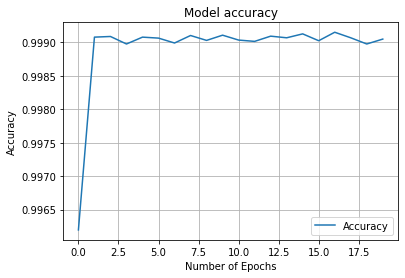

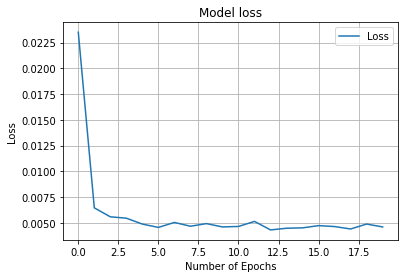

In [46]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Number of Epochs')
plt.legend(['Accuracy'])
plt.grid()
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Number of Epochs')
plt.legend(['Loss'])
plt.grid()
plt.show()

- [x] (a) Fine-tune number of layers
- [x] (b) Number of Neurons in each layers
- [x] (c) Experiment in batch-size
- [x] (d) Experiment with number of epochs. Check the observations in loss and accuracy
- [x] (e) Play with different Learning Rate variants of Gradient Descent like Adam, SGD, RMS-prop
- [x] (f) Find out which activation performs best for this use case and why?
- [ ] (g) Check Confusion Matrix, Precision, Recall and F1-Score
- [ ] 2  Try out Dropout for ANN. How is it performed? Compare model performance with the traditional ML based prediction models from above. 
- [x] 3  Find the best setting of neural net that can be best classified as fraudulent and non-fraudulent transactions. Use techniques like Grid Search, Cross-Validation and Random search.

In [47]:
# predict
y_pred_ann = model.predict(X_test)

In [48]:
from sklearn.metrics import confusion_matrix
# predict using model
predict_ann = model.predict(X_test)

# greater that#n 0.5 indicates a value of 1 for sigmoid function
predict_ann = (predict_ann > 0.5)

In [49]:
# Precision
print("Precision:",precision_score(y_test, predict_ann))

# Recall
print("Recall:",recall_score(y_test, predict_ann))

# F1_Score
print("F1-Score:",f1_score(y_test, predict_ann))

Precision: 0.8732394366197183
Recall: 0.6326530612244898
F1-Score: 0.7337278106508875


In [50]:
print("Naive Bayes has a F1-Score of",f1_score(y_test, y_pred_gnb))
print("Logistic Regression has a F1-Score of",f1_score(y_test, y_pred_log))
print("SVM has a F1-Score of",f1_score(y_test, y_pred_svm))
print("Random Forrest has a F1-Score of",f1_score(y_test, y_pred_rf))
print("XGBoost has a F1-Score of",f1_score(y_test, y_pred_xgb))
print("Our Deep Learning model has a F1-Score of",f1_score(y_test, predict_ann))

Naive Bayes has a F1-Score of 0.07189829022358614
Logistic Regression has a F1-Score of 0.08317214700193423
SVM has a F1-Score of 0.1673228346456693
Random Forrest has a F1-Score of 0.6503067484662577
XGBoost has a F1-Score of 0.6951219512195121
Our Deep Learning model has a F1-Score of 0.7337278106508875


<div class="alert alert-block alert-success">
<b>Our Deep Learning model has an F1-Score only beaten by XGBoost. This is good considering XGBoost is so highly regarded as a model</b>
</div>

<div class="alert alert-block alert-success">
<b>Dropout: Deep Learing models have a tendency to easily overfit. This means they become well-trained on trainin data but not very good at making predictions on new data <br> To combat this a dropout is added. The key idea is to randomly drop units (along with their connections) from the neural network during training. This prevents units from co-adapting too much. </b>
</div>

- [x] (a) Fine-tune number of layers
- [x] (b) Number of Neurons in each layers
- [x] (c) Experiment in batch-size
- [x] (d) Experiment with number of epochs. Check the observations in loss and accuracy
- [x] (e) Play with different Learning Rate variants of Gradient Descent like Adam, SGD, RMS-prop
- [x] (f) Find out which activation performs best for this use case and why?
- [ ] (g) Check Confusion Matrix, Precision, Recall and F1-Score
- [x] 2  Try out Dropout for ANN. How is it performed? Compare model performance with the traditional ML based prediction models from above. 
- [x] 3  Find the best setting of neural net that can be best classified as fraudulent and non-fraudulent transactions. Use techniques like Grid Search, Cross-Validation and Random search.

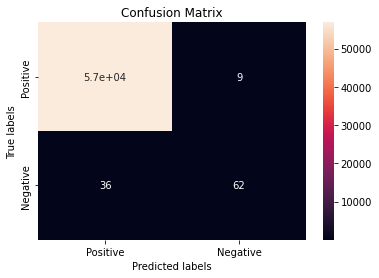

In [51]:
# Confusion Matrix
ax= plt.subplot()

cm = confusion_matrix(y_test, predict_ann)

sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Positive', 'Negative']); ax.yaxis.set_ticklabels(['Positive', 'Negative']);

- [x] (a) Fine-tune number of layers
- [x] (b) Number of Neurons in each layers
- [x] (c) Experiment in batch-size
- [x] (d) Experiment with number of epochs. Check the observations in loss and accuracy
- [x] (e) Play with different Learning Rate variants of Gradient Descent like Adam, SGD, RMS-prop
- [x] (f) Find out which activation performs best for this use case and why?
- [x] (g) Check Confusion Matrix, Precision, Recall and F1-Score
- [x] 2  Try out Dropout for ANN. How is it performed? Compare model performance with the traditional ML based prediction models from above. 
- [x] 3  Find the best setting of neural net that can be best classified as fraudulent and non-fraudulent transactions. Use techniques like Grid Search, Cross-Validation and Random search.

### Anomaly Detection:

4.    Implement anomaly detection algorithms.
- [ ] (a)    Assume that the data is coming from a single or a combination of multivariate Gaussian
- [ ] (b)    Formalize a scoring criterion, which gives a scoring probability for the given data point whether it belongs to the multivariate Gaussian or Normal Distribution fitted in (a)
 

In [52]:
## Get the Fraud and the normal dataset 
fraud = train_data[train_data['Class']==1]
non_fraud = train_data[train_data['Class']==0]

# need this as a parameter for algorithm
contamination = len(fraud)/float(len(non_fraud))

In [53]:
from sklearn.ensemble import IsolationForest
from sklearn.covariance import EllipticEnvelope

from sklearn.metrics import accuracy_score

### Isolation Forest

In [54]:
model_iso = IsolationForest(max_samples=len(X_train), contamination=contamination)

In [55]:
model_iso.fit(X_train)
scores_criterion_iso = model_iso.decision_function(X_train)

y_pred_iso = model_iso.predict(X_train)          # The model automatically gives us 1 for inliers, -1 for outliers. 
y_pred_iso[y_pred_iso == 1] = 0                  # We convert this to give 0 for inliers, 1 for outliers so we can match
y_pred_iso[y_pred_iso == -1] = 1
n_outliers = (y_pred_iso != y_train).sum()
print("Isolation Forest algorithm has detected",n_outliers, "errors")
print("Isolation Forest algorithm has an accuracy score of",accuracy_score(y_train,y_pred_iso))

Isolation Forest algorithm has detected 503 errors
Isolation Forest algorithm has an accuracy score of 0.9977923588404398


### Robust Covariance

In [57]:
model_elen = EllipticEnvelope(random_state=0)

In [58]:
model_elen.fit(X_train)
scores_prediction_elen = model_elen.decision_function(X_train)

y_pred_elen = model_elen.predict(X_train)          # The model automatically gives us 1 for inliers, -1 for outliers. 
y_pred_elen[y_pred_elen == 1] = 0                  # We convert this to give 0 for inliers, 1 for outliers so we can match
y_pred_elen[y_pred_elen == -1] = 1
n_outliers = (y_pred_elen != y_train).sum()
print("Elliptic Envelope algorithm has detected",n_outliers, "errors")
print("Elliptic Envelope algorithm has an accuracy score of",accuracy_score(y_train,y_pred_elen))

Elliptic Envelope algorithm has detected 22497 errors
Elliptic Envelope algorithm has an accuracy score of 0.9012618227303649


<div class="alert alert-block alert-info">
<b>We will work with the Isolation Forest because it gave a much better accuuracy score.</b>
</div>

In [59]:
# add 2 new columns to the dataframe
train_data['scores'] = scores_criterion_iso
# X_train['Iso_Classify'] = y_pred_iso

<div class="alert alert-block alert-info">
<b>The decision function returns values between -0.5 and 0.5.  Negative scores represent outliers, positive scores represent inliers. <br>
We create a probability scoring by making this range between 0 and 1 (adding 0.5 to each score). This will give us a probbaility of it being an inlier (within Gaussian distribution)</b>
</div>

In [60]:
train_data['probability_inlier'] = train_data['scores'] + 0.5

In [61]:
train_data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V24,V25,V26,V27,V28,Class,std_amount,std_time,scores,probability_inlier
0,1.043949,0.318555,1.045810,2.805989,-0.561113,-0.367956,0.032736,-0.042333,-0.322674,0.499167,...,0.684812,0.318620,-0.204963,0.001662,0.037894,0,-0.156600,-1.187316,0.196646,0.696646
1,-1.665159,0.808440,1.805627,1.903416,-0.821627,0.934790,-0.824802,0.975890,1.747469,-0.658751,...,0.147565,-0.529358,-0.566950,-0.595998,-0.220086,0,-0.288523,-1.519945,0.165829,0.665829
2,-0.324096,0.601836,0.865329,-2.138000,0.294663,-1.251553,1.072114,-0.334896,1.071268,-1.109522,...,-0.145791,0.094194,-0.804026,0.229428,-0.021623,0,-0.352771,-1.943605,0.187533,0.687533
3,-0.258270,1.217501,-0.585348,-0.875347,1.222481,-0.311027,1.073860,-0.161408,0.200665,0.154307,...,0.178614,-0.315616,0.096665,0.269740,-0.020635,0,-0.313351,-0.167996,0.203384,0.703384
4,2.142162,-0.494988,-1.936511,-0.818288,-0.025213,-1.027245,-0.151627,-0.305750,-0.869482,0.428729,...,-0.480899,0.023846,-0.279076,-0.030121,-0.043888,0,-0.195737,0.683136,0.194502,0.694502


- [x] (a)    Assume that the data is coming from a single or a combination of multivariate Gaussian
- [x] (b)    Formalize a scoring criterion, which gives a scoring probability for the given data point whether it belongs to the multivariate Gaussian or Normal Distribution fitted in (a)

## Project Task: Week 4

Inference and Observations:

- [ ] 1 Visualize the scores for Fraudulent and Non-Fraudulent transactions.
- [ ] 2 Find out the threshold value for marking or reporting a transaction as fraudulent in your anomaly detection system.
- [ ] 3 Can this score be used as an engineered feature in the models developed previously? 
Are there any incremental gains in F1-Score? 
Why or Why not?
- [ ] 4 Be as creative as possible in finding other interesting insights.

In [62]:
fraud = train_data[train_data['Class']==1]
non_fraud = train_data[train_data['Class']==0]

### Fraudulant

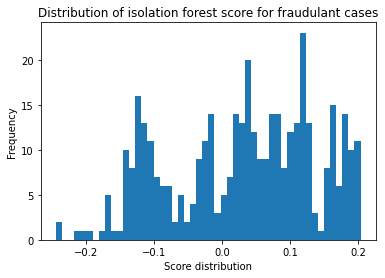

In [63]:
#Plot the combined distribution of the scores 
%matplotlib inline
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
# %pylab.inline
normal = plt.hist(fraud.scores, 50,)
plt.xlabel('Score distribution')
plt.ylabel('Frequency')
plt.title("Distribution of isolation forest score for fraudulant cases")
plt.show()

### Non-Fradulant

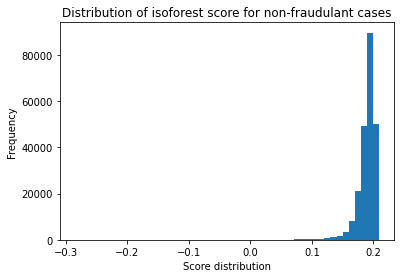

In [64]:
#Plot the combined distribution of the scores 
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
normal = plt.hist(non_fraud.scores, 50,)
plt.xlabel('Score distribution')
plt.ylabel('Frequency')
plt.title("Distribution of isoforest score for non-fraudulant cases")
plt.show()

- [x] 1 Visualize the scores for Fraudulent and Non-Fraudulent transactions.

<div class="alert alert-block alert-success">
<b>We took the threshold value to be the percentage of anomalies present in the data. This is also known as the contamination.
It was calculated earlier as it is a parameter in Anomaly Detection Algorithm. <br> It is given below.</b>
</div>

In [65]:
contamination

0.0017322412299792043

- [x] 2 Find out the threshold value for marking or reporting a transaction as fraudulent in your anomaly detection system.

In [66]:
X_test['anomaly'] = model_iso.predict(X_test)

In [67]:
X_train['anomaly'] = y_pred_iso

### Do model for XGBoost with new feature

In [68]:
xg_class2 = xgb.XGBClassifier(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1, 
                             max_depth = 5, alpha = 10, n_estimators = 10)

In [69]:
xg_class2.fit(X_train,y_train)

[19:56:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.


XGBClassifier(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3,
              enable_categorical=False, gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=10, n_jobs=8, num_parallel_tree=1,
              objective='reg:linear', predictor='auto', random_state=0,
              reg_alpha=10, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [70]:
y_pred_xgb = xg_class2.predict(X_test)

In [71]:
# XGBoost F1-Score
print("F1-Score:",f1_score(y_test, y_pred_xgb))

F1-Score: 0.6951219512195121


<Figure size 504x504 with 0 Axes>

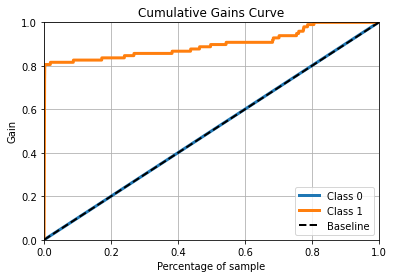

In [72]:
# cumulative gains chart
predicted_probas_xg = xg_class2.predict_proba(X_test)
plt.figure(figsize=(7,7))
skplt.metrics.plot_cumulative_gain(y_test, predicted_probas_xg)
plt.show()

<div class="alert alert-block alert-success">
<b>This cannot be used as an engineered feature. We don't see any improvement in F1-Score of the XGBoost model. This is due to the fact that the scores feature is very heavily correlated to the other 30 features the model is using. <br>
This is no surprise considering the new feature is predicted using these features</b> </div>

- [x] 3 Can this score be used as an engineered feature in the models developed previously? 
Are there any incremental gains in F1-Score? 
Why or Why not?

<div class="alert alert-block alert-success">
<b>The distribution of the scores for the non-fradulant cases is negatively skewed. More importantly, they fall on to the right of 0 (they are mostly positive scores). <br>
This implies most of the non-fraudulant cases are also not considered outliers (as most have positive scores).<br>
The fraudulant cases scores, however, appear to be a lot more random and do not follow any particular distribution. They appear to be a lot more evenly spread either side of the zero mark.</b>
</div>

- [x] 4 Be as creative as possible in finding other interesting insights.